Importing packages

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import nbconvert

Loading the data.

In [13]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

Preparing the data.

In [35]:
train.keys()
test.keys()
print('Shape of the test set:\n{},\nShape of the train set:\n{}'.format(test.shape, 
                                                                        train.shape))
# train and test sets
X = train.iloc[:, 2:]
y = train.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Shape of the test set:
(200000, 201),
Shape of the train set:
(200000, 202)


In [5]:
unique_variable = None
for i in train.keys():
    if i in test.keys():
        continue
    else:
        unique_variable = i
print('Unique variable to the train set:\n{}'.format(unique_variable))

Unique variable to the train set:
target


Looking for missing values.

In [6]:
print('Missing values in the test set:\n{}\n\nMissing values in the train set:\n{}'
      .format(test.isnull().sum().sum(), train.isnull().sum().sum()))

Missing values in the test set:
0

Missing values in the train set:
0


Creating target dataframe.

In [8]:
target = train[['ID_code', 'target']]

Feature Distribution

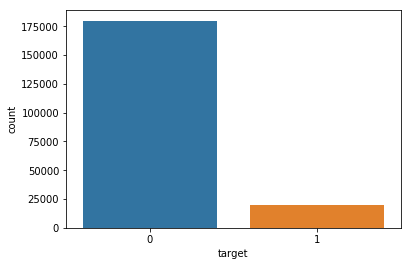

10.049% of target values are of value 1.


In [9]:
sns.countplot(target['target'])
plt.show()
print('{}% of target values are of value 1.'.format(100*target['target'].value_counts()[1]/train.shape[0]))


In [25]:
def plot_Features(df1, df2, train_features):
    i = 0
    plt.figure(figsize=(18,22))
    for feature in train_features:
        i += 1
        plt.subplot(6,2, i)
        sns.distplot(df1[feature], color='orange', hist=False)
        sns.distplot(df2[feature], color='blue', hist=False)
        #legend
    plt.show()
# compare train and test features
# def plot_Features_distribution

In [27]:
x = train.loc[train['target'] == 1]
y = train.loc[train['target'] == 0]
features = ['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
            'var_8', 'var_9', 'var_10', 'var_11']

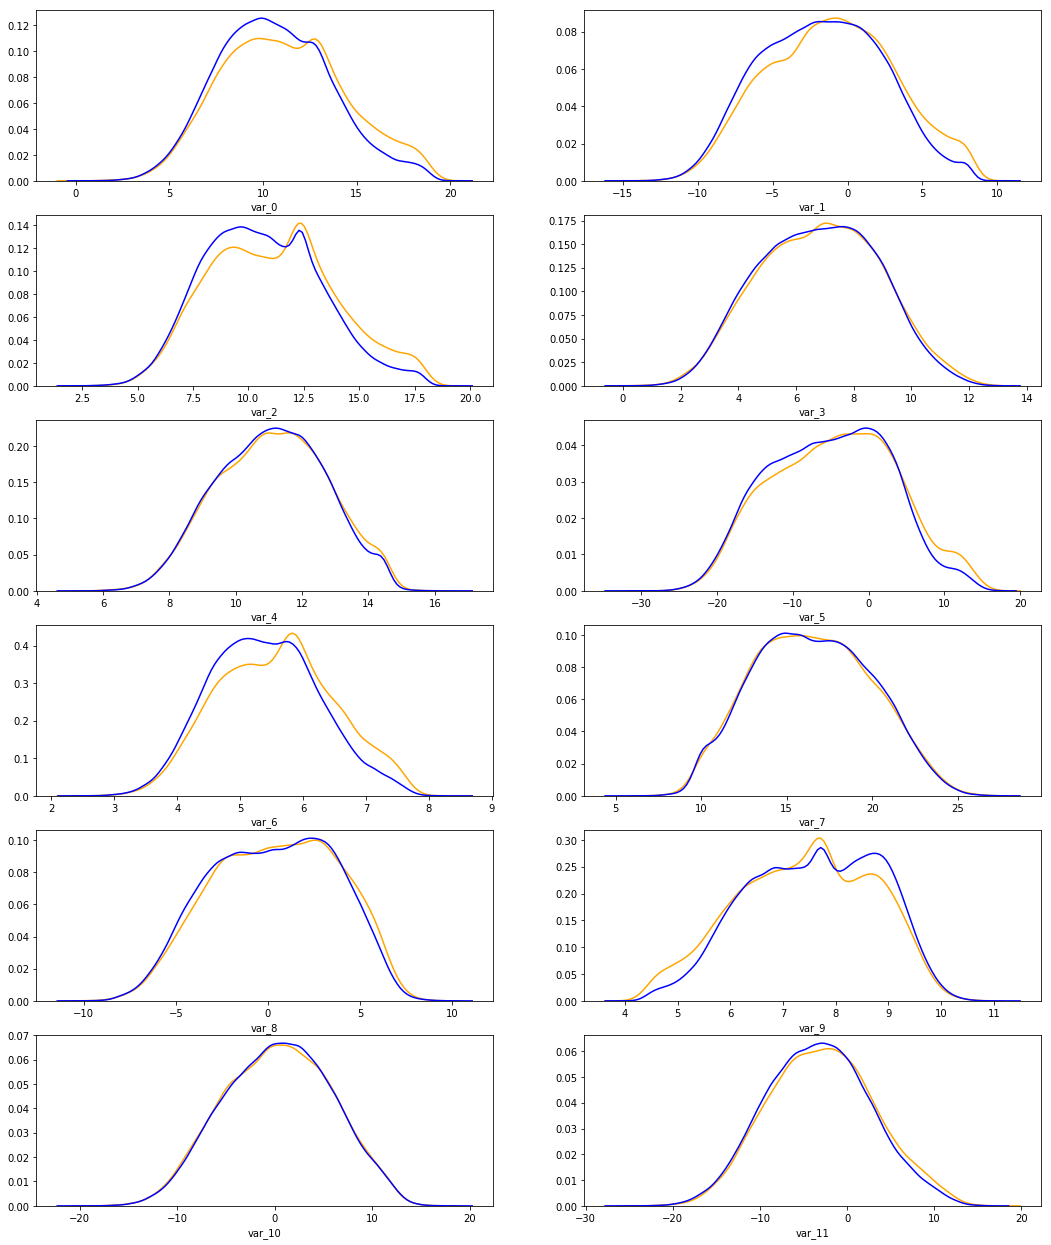

In [28]:
plot_Features(x, y, features)


Feature Importance with ExtraTreesClassifier

In [36]:
etc = ExtraTreesClassifier(n_estimators=100, max_features=100, random_state=0)
etc_fitted = etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=100, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
importances = etc.feature_importances_
indic = np.argsort(importances)[::-1]